# Advanced ML: Домашнее задание 1

### Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

Прокурор оценил вероятности:  
P(невиновный человек имеет редкую группу крови) - 1%  
P(невиновный человек не имеет редкую группу крови) - 99%  

Необходимо было оценить:  
P(подсудимый убийца | подсудимый имеет редкую группу крови, убийца имеет редкую группу крови) = P(A| B, C)  
$$
P(A | B, C) = \frac{P(B, | A, C) P(A | C)}{P(B | A, C)P(A | C) + P(B | \neg A, C)P(\neg A | C)} = \frac{ P(A)}{P(A) + 0.01 (1 - P(A))}
$$

Данная вероятность зависит от априорной вероятности того, что подсудимый убийца, и она оказывается высокой даже при низких значениях априорной вероятности (92.5% если $P(A)=0.1$). Тем не менее было бы некорректно делать выводы об убийстве, не проведя анализ крови у других подозреваемых и не учитывая их результаты для подсчёта апостериорной вероятности, ведь если у кого-то ещё из подозреваемых будет обнаружена эта группа крови, то это сильно снизит апостериорную вероятность того, что убийца именно подсудимый.

### Задание 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

Адвокат оценил вероятность:  
P(случайно взятый горожанин с редкой групой крови убийца | убийца имеет редкую группу крови) 

Адвокат здесь не учитывает другие факторы почему данный человек оказался подсудимым, ведь наверняка уже были какие-то показания, которые привели к тому что на него пало подозрение и у него взяли анализ крови, а значит и априорная вероятность что он убийца выше, чем у случайно взятого человека с данной группой крови. На самом деле нужно было оценить ту же вероятность, что и в задании 1.

### Задание 3 

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.  
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).  
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

Введём обозначения:  
T - положительный тест  
C - тестируемый действительно заражён  
FP - false positive $(T|\neg C)$  
FN - false negative $(\neg T|C)$

$$
P(C|T) = \frac{P(T|C)P(C)}{P(T|C)P(C) + P(T|\neg C)P(\neg C)} = \frac{0.01(1 - P(FN))}{0.01(1 - P(FN)) + 0.99 P(FP)}
$$

$$
P(C|\neg T) = \frac{P(\neg T|C)P(C)}{P(\neg T|C)P(C) + P(\neg T|\neg C)P(\neg C)} = \frac{0.01 P(FN)}{0.01 P(FN) + 0.99 (1 - P(FP))} 
$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def get_proba(test_result, fp, fn):
    if test_result:
        return (0.01 * (1 - fn))/(0.01 * (1 - fn) + 0.99 * fp)
    else:
        return (0.01 * fn)/(0.01 * fn + 0.99 * (1 - fp))

In [28]:
rates = np.linspace(0, 0.05, 50)
fp_fixed_test_positive = [get_proba(1, 0.05, fn) for fn in rates]
fp_fixed_test_negative = [get_proba(0, 0.05, fn) for fn in rates]
fn_fixed_test_positive = [get_proba(1, fp, 0.05) for fp in rates]
fn_fixed_test_negative = [get_proba(0, fp, 0.05) for fp in rates]

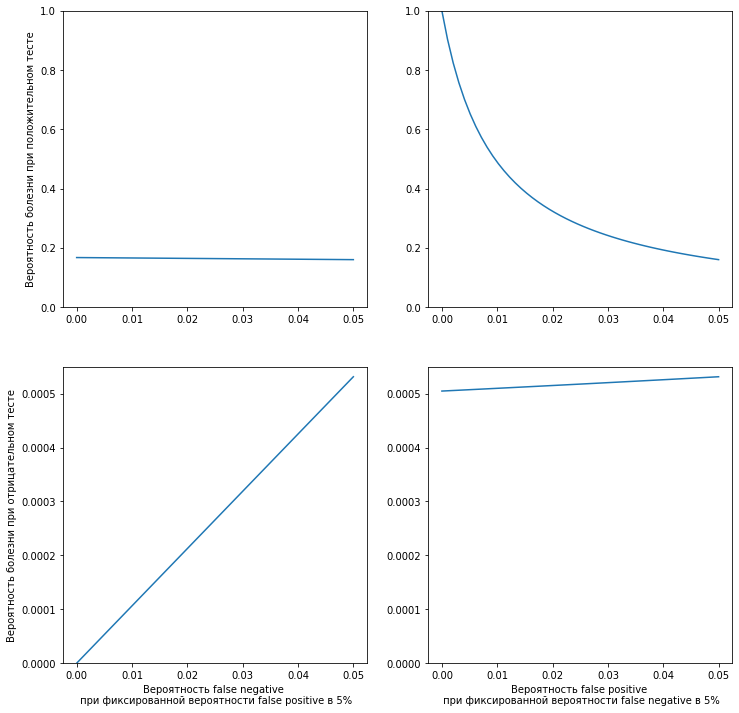

In [34]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(rates, fp_fixed_test_positive)
plt.ylabel('Вероятность болезни при положительном тесте')
plt.ylim(0, 1)
plt.subplot(2, 2, 2)
plt.plot(rates, fn_fixed_test_positive)
plt.ylim(0, 1)
plt.subplot(2, 2, 3)
plt.plot(rates, fp_fixed_test_negative)
plt.ylabel('Вероятность болезни при отрицательном тесте')
plt.xlabel('Вероятность false negative \n при фиксированной вероятности false positive в 5%')
plt.ylim(0, 0.00055)
plt.subplot(2, 2, 4)
plt.plot(rates, fn_fixed_test_negative)
plt.xlabel('Вероятность false positive \n при фиксированной вероятности false negative в 5%')
plt.ylim(0, 0.00055)
plt.show()

Уменьшение вероятности false negative поможет быть более уверенными, что в случае отрицательного теста тестируемый действительно здоров, но почти не увеличит уверенность в болезни у человека с положительным тестом. Уменьшение вероятности false positive поможет быть более уверенными, что в случае положительного теста тестируемый действительно болен, но почти не увеличит уверенность в том, что он здоров, если тест отрицательный.  

Таким образом, рекомендации будут зависить от целей врачей. Если важнее пропускать как можно меньше заражённых (на данный момент это около 5 человек на 10000 отрицательных тестов), то стоит уменьшать вероятность false negative.  
Если же важнее, чтобы было меньше здоровых людей, у которых тест обнаруживает вирус, то следует уменьшать вероятность false positive. На данный момент почти 84% людей с положительным тестом на самом деле здоровы, так что это кажется более важной задачей, так как большое количество ресурсов тратится на на самом деле здоровых людей, которым помощь не нужна, и меньше ресурсов остаётся на действительно заражённых.